# EDA of Olympics dataset

### Olympics spanning from 1896 - 2016

## Things to look for

1. Country with most medals X
2. Top 10 countries Overall medals X
3. Top 10 countries for most medals in Summer
4. top 10 countries for most medals in Winter
3. Country with most Gold medals X
4. Athlete with most medals all time x
5. Top 10 people all time medals x
6. Country with most medals in recent year
7. Athlete with most medals in recent year
8. Number of different sports x
9. Number of different events x
10. Average Age of athletes x
11. Average Age of athletes per country (top 10 youngest , top 10 oldest)
12. Youngest person to compete x
13. Oldest person to compete x
14. Country with the most althletes x
15. First year of Olympics and most recent year x
16. Number of male athletes
17. Number of female athletes



## Possible data cleaning

1. Nan values (Check columns for null values and determine if these can be filled in)

## Things I noticed

1. Height and weight do not change for athlete in this dataset
2. Team and NOC don't necessarily coincide (Ex.Atalanta Boat Club -1's NOC is USA )
3. NOC  means National Olympic Commitee (Source says 206 but dataet has 230)
3. First Winter Olympics were in 1924




In [80]:

pip install matplotlib

     ---------------------------------------- 7.8/7.8 MB 31.3 MB/s eta 0:00:00
     ------------------------------------- 188.2/188.2 kB 11.9 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 46.7 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 41.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
pip install seaborn

     -------------------------------------- 294.9/294.9 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Import Neccessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read in athlete_events dataset

df = pd.read_csv('athlete_events.csv')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [67]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [70]:
df.shape

(271116, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [4]:
#Check number of missing values in each column

df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [71]:
# First year of olympics

df['Year'].min()

1896

In [75]:
df.query('Season == "Winter"')['Year'].min()

1924

In [72]:
# Most recent Year of olympics

df['Year'].max()

2016

In [8]:
# Number of Countries

df['NOC'].nunique()


230

In [9]:
# Number of Sports

df['Sport'].nunique()

66

In [10]:
# Number of events

df['Event'].nunique()

765

In [66]:
# Number of athletes that have competed

df['Name'].nunique()

134732

In [4]:
df['ID'].nunique()

135571

In [65]:
# Country with the most althletes

df.groupby('NOC')[['Name']].nunique().sort_values('Name', ascending=False).head(10)



,Name
NOC,
USA,9652
GBR,6273
FRA,6161
ITA,4921
GER,4860
CAN,4809
JPN,4036
AUS,3818
SWE,3782


<Axes: xlabel='NOC'>

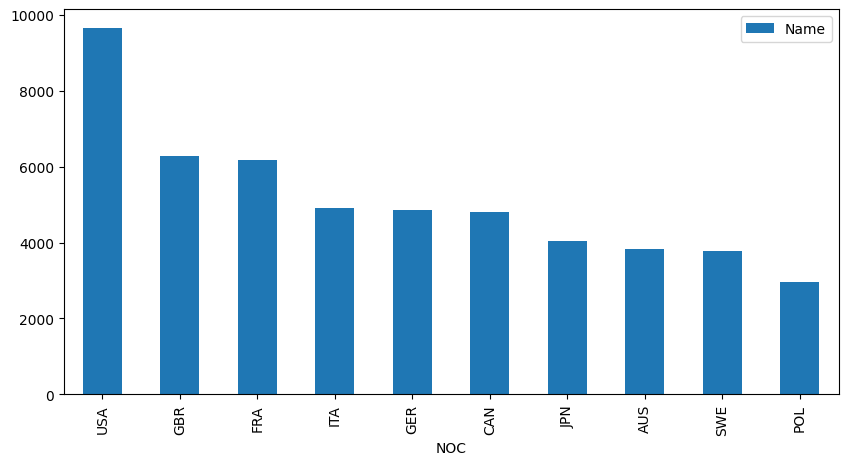

In [84]:
# Country with the most althletes graph

df.groupby('NOC')[['Name']].nunique().sort_values('Name', ascending=False).head(10).plot(kind='bar', figsize=(10,5))

In [53]:
# Countries with the most medals

df.query("Medal != 'NA'").groupby('NOC')[['Medal']].count().sort_values('Medal', ascending=False).head(10)

,Medal
NOC,
USA,5637
URS,2503
GER,2165
GBR,2068
FRA,1777
ITA,1637
SWE,1536
CAN,1352
AUS,1320


In [73]:
# Countries with most overall medals for Winter sports

df.query("Season == 'Winter' and Medal != 'NA'").groupby('NOC')[['Medal']].count().sort_values('Medal', ascending=False).head(10)

,Medal
NOC,
USA,635
CAN,611
NOR,443
URS,440
SWE,428
FIN,426
GER,386
AUT,280
SUI,275


In [74]:
# Countries with most overall medals for Summer sports

df.query("Season == 'Summer' and Medal != 'NA'").groupby('NOC')[['Medal']].count().sort_values('Medal', ascending=False).head(10)

,Medal
NOC,
USA,5002
URS,2063
GBR,1985
GER,1779
FRA,1627
ITA,1446
AUS,1304
HUN,1123
SWE,1108


In [24]:
#Countries with most Gold medals

df.query('Medal == "Gold"').groupby('NOC')[['Medal']].count().sort_values('Medal', ascending=False).head(10)

,Medal
NOC,
USA,2638
URS,1082
GER,745
GBR,678
ITA,575
FRA,501
SWE,479
CAN,463
HUN,432


In [39]:
# Athletes with the most medals

df[['Name','Medal','Sport']].groupby('Name')[['Medal']].count().sort_values('Medal', ascending=False).head(15)

,Medal
Name,
"Michael Fred Phelps, II",28
Larysa Semenivna Latynina (Diriy-),18
Nikolay Yefimovich Andrianov,15
Takashi Ono,13
Borys Anfiyanovych Shakhlin,13
Ole Einar Bjrndalen,13
Edoardo Mangiarotti,13
Natalie Anne Coughlin (-Hall),12
Sawao Kato,12


In [42]:
# Athletes with the most medals w/ sport

df[['Name','Medal','Sport']].groupby('Name').agg({'Medal': 'count', 'Sport': 'first'}).sort_values('Medal', ascending=False).head(15)

,Medal,Sport
Name,,
"Michael Fred Phelps, II",28,Swimming
Larysa Semenivna Latynina (Diriy-),18,Gymnastics
Nikolay Yefimovich Andrianov,15,Gymnastics
Takashi Ono,13,Gymnastics
Borys Anfiyanovych Shakhlin,13,Gymnastics
Ole Einar Bjrndalen,13,Biathlon
Edoardo Mangiarotti,13,Fencing
Natalie Anne Coughlin (-Hall),12,Swimming
Sawao Kato,12,Gymnastics


In [9]:
df.query("Season == 'Winter'").groupby('Name')[['Age']].min().sort_values('Age', ascending=True).head(1)

,Age
Name,
Etsuko Inada,11.0


In [46]:
# Youngest Althlete

df.groupby('Name')[['Age']].min().sort_values('Age', ascending=True).head(1)


,Age
Name,
Dimitrios Loundras,10.0


In [49]:
df.query("Name == 'Dimitrios Loundras'")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


In [47]:
# Oldest Althlete

df.groupby('Name')[['Age']].max().sort_values('Age', ascending=False).head(1)

,Age
Name,
John Quincy Adams Ward,97.0


In [48]:
df.query("Name == 'John Quincy Adams Ward'")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


In [63]:
# Average Age of athletes per country

df[['NOC','Age','Team']].groupby('NOC').agg({'Team': 'first','Age': 'mean' }).sort_values('Age', ascending=True).head(10)

,Team,Age
NOC,,
TUV,Tuvalu,20.142857
MHL,Marshall Islands,20.285714
MDV,Maldives,20.918367
NFL,Newfoundland,21.000000
YEM,Yemen,21.093750
VIN,Saint Vincent and the Grenadines,21.547619
LAO,Laos,21.574074
KIR,Kiribati,21.636364
SUR,Suriname,21.671642


In [62]:
df[['NOC','Age','Team']].groupby('NOC').agg({'Team': 'first','Age': 'mean' }).sort_values('Age', ascending=False).head(10)

,Team,Age
NOC,,
MON,Monaco,30.047120
NAM,Namibia,27.857143
IRL,Ireland,27.473727
DEN,Denmark,27.351488
ISV,United States Virgin Islands,27.336770
ASA,American Samoa,27.216216
MNE,Montenegro,27.074468
POR,Portugal,27.039429
BEL,Belgium,27.031599


In [21]:
# Drop duplicate IDs

df_unique_ids = df.drop_duplicates('ID')

In [23]:
df_unique_ids['Sex'].value_counts()

M    101590
F     33981
Name: Sex, dtype: int64

In [17]:
df['ID'].nunique()

135571